# Classification Experiments

Import data after cleaning in Part 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('no_show_data_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 12 columns):
AppointmentID    110521 non-null int64
Gender           110521 non-null object
Age              110521 non-null int64
Neighbourhood    110521 non-null object
Scholarship      110521 non-null int64
Hypertension     110521 non-null int64
Diabetes         110521 non-null int64
Alcoholism       110521 non-null int64
Handicap         110521 non-null int64
SMS_received     110521 non-null int64
No_show          110521 non-null int64
waitdays         110521 non-null int64
dtypes: int64(10), object(2)
memory usage: 10.1+ MB


In [4]:
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})
df.head()

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,waitdays
0,5642903,1,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5642503,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,5642549,1,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,5642828,1,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,5642494,1,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


In [5]:
col = ['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show', 'waitdays']
df = df[col]
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,waitdays
0,1,62,0,1,0,0,0,0,0,-1
1,0,56,0,0,0,0,0,0,0,-1
2,1,62,0,0,0,0,0,0,0,-1
3,1,8,0,0,0,0,0,0,0,-1
4,1,56,0,1,1,0,0,0,0,-1


In [22]:
all_features = df[['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes','Alcoholism','Handicap','SMS_received','waitdays']]
target = df[['No_show']]

In [7]:
df.No_show.value_counts()

0    88207
1    22314
Name: No_show, dtype: int64

Train and test split with stratification. 

Train = 75%, test = 25%

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_features, target, test_size=0.25, random_state=42, stratify=target)

In [9]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)



In [7]:
#Majority model
def zero_rule(train, test):
    output_val = [i for i in train]
    prediction = max(set(output_val), key=output_val.count)
    predicted = [prediction for i in range(len(test))]
    return predicted

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

### Majority Baseline classification

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
def run_baseline_model(splits, X, Y, average_method='macro'):
    kfold = StratifiedKFold(splits, shuffle=True)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    f1_micro = []
    for train, test in kfold.split(X, Y):

        prediction = zero_rule(Y[train], Y[test])

        acc = accuracy_score(Y[test], prediction)
        
        accuracy.append(acc*100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        f1_micro.append(f1_score(Y[test], prediction, average='micro')*100)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))
    print("f1 micro score: %.2f%% (+/= %.2f%%)" % (np.mean(f1_micro), np.std(f1_micro)))

In [13]:
run_baseline_model(5, df.Age, df.No_show)

/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy: 79.81% (+/- 0.00%)
precision: 39.91% (+/- 0.00%)
recall: 50.00% (+/- 0.00%)
f1 score: 44.39% (+/- 0.00%)
f1 micro score: 79.81% (+/= 0.00%)


## Experiment 1: All features
#### Classifiers: LogReg, LinearSVC, RandomForest

In [24]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression

class ClassifierPipeline(BaseEstimator):

    def __init__(self, estimator = LogisticRegression(),):
        """
        A custom BaseEstimator that can switch between classifiers in the pipe.
        Defaults to Logistic Regression.
        
        :param estimator: sklearn object; switches between any sklearn estimator
        """
        self.estimator = estimator
    
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self
    
    def predict(self, X, y=None):
        return self.estimator.predict(X)
    
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    
    def score(self, X, y):
        return self.estimator.score(X, y)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
pipe = Pipeline(steps=[('clf', ClassifierPipeline())])
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'f1-score': make_scorer(f1_score),
           'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score)}

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [24]:
param_gridLR = [
    {
        'clf__estimator': [LogisticRegression()],
        'clf__estimator__penalty': ['l2'],
        'clf__estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    }]
searchLR = GridSearchCV(pipe, param_gridLR, cv=5, n_jobs=-1, return_train_score=False, verbose=3, scoring=scoring, refit='AUC')


In [32]:

param_gridSVC = [
    {
        'clf__estimator': [LinearSVC()],
        'clf__estimator__penalty': ['l2'],
        'clf__estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    }]
searchSVC = GridSearchCV(pipe, param_gridSVC, cv=5, n_jobs=-1, return_train_score=False, verbose=3, refit=True)


In [26]:
param_gridRF = [
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [200, 500],
        'clf__estimator__max_features': ['auto', 'sqrt', 'log2'],
        'clf__estimator__max_depth': [4,5,6,7,8],
        'clf__estimator__criterion': ['gini', 'entropy'],
    }
]
searchRF = GridSearchCV(pipe, param_gridRF, cv=5, n_jobs=-1, return_train_score=False, verbose=3, scoring=scoring, refit='AUC')


In [10]:
target_names = ['Show', 'No-show']

LOGISTIC REGRESSION
Best parameter (CV score=0.660):
{'clf__estimator': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'clf__estimator__C': 10, 'clf__estimator__penalty': 'l2'}
Best estimator:  Pipeline(memory=None,
     steps=[('clf', ClassifierPipeline(estimator=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)))])
Test Score (AUC):  0.6590249847620188
Accuracy:  0.7958090550468676
Classification Report:
              precision    recall  f1-score   support

        Show       0.80      0.99      0.89     22052
     No-show       0.36      0.01      0.03      55

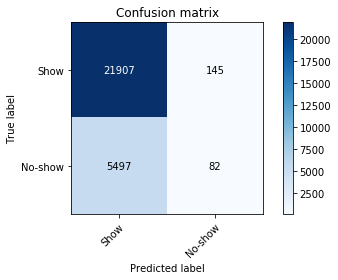

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('LOGISTIC REGRESSION')
print("Best parameter (CV score=%0.3f):" % searchLR.best_score_)
print(searchLR.best_params_)
print('Best estimator: ', searchLR.best_estimator_)

y_predLR = searchLR.predict(X_test)
test_score = searchLR.score(X_test, y_test)
print('Test Score (AUC): ', test_score)
print('Accuracy: ', accuracy_score(y_test, y_predLR))
print('Classification Report:')
print(classification_report(y_test, y_predLR, target_names=target_names))
plot_confusion_matrix(y_test, y_predLR, classes=target_names,
                      title='Confusion matrix')
plt.show()

LINEAR SVC
Best parameter (CV score=0.796):
{'clf__estimator': LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'clf__estimator__C': 0.001, 'clf__estimator__penalty': 'l2'}
Best estimator:  Pipeline(memory=None,
     steps=[('clf', ClassifierPipeline(estimator=LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)))])
Test Score (Accuracy):  0.7963519235641128
Accuracy:  0.7963519235641128
Classification Report:
              precision    recall  f1-score   support

        Show       0.80      1.00      0.89     22052
     No-show       0.31      0.01      0.01      5579

   micro avg       0.80      0.80      0.80     27631
   macro avg       0.56      0.50  

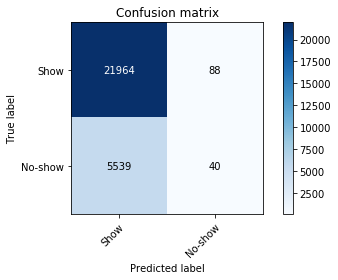

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('LINEAR SVC')
print("Best parameter (CV score=%0.3f):" % searchSVC.best_score_)
print(searchSVC.best_params_)
print('Best estimator: ', searchSVC.best_estimator_)

y_predSVC = searchSVC.predict(X_test)
test_score = searchSVC.score(X_test, y_test)
print('Test Score (Accuracy): ', test_score)
print('Accuracy: ', accuracy_score(y_test, y_predSVC))
print('Classification Report:')
print(classification_report(y_test, y_predSVC, target_names=target_names))
plot_confusion_matrix(y_test, y_predSVC, classes=target_names,
                      title='Confusion matrix')
plt.show()

RANDOM FOREST
Best parameter (CV score=0.730):
{'clf__estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'clf__estimator__criterion': 'gini', 'clf__estimator__max_depth': 8, 'clf__estimator__max_features': 'sqrt', 'clf__estimator__n_estimators': 500}
Best estimator:  Pipeline(memory=None,
     steps=[('clf', ClassifierPipeline(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w

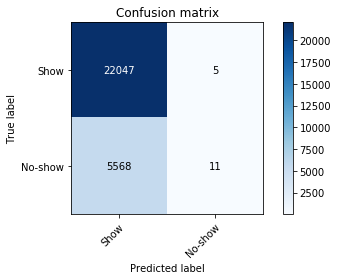

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('RANDOM FOREST')
print("Best parameter (CV score=%0.3f):" % searchRF.best_score_)
print(searchRF.best_params_)
print('Best estimator: ', searchRF.best_estimator_)

y_predRF = searchRF.predict(X_test)
test_score = searchRF.score(X_test, y_test)
print('Test Score (AUC): ', test_score)
print('Accuracy: ', accuracy_score(y_test, y_predRF))
print('Classification Report:')
print(classification_report(y_test, y_predRF, target_names=target_names))
plot_confusion_matrix(y_test, y_predRF, classes=target_names,
                      title='Confusion matrix')
plt.show()

/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy:  0.7982700589917122
Classification Report:
              precision    recall  f1-score   support

        Show       0.80      1.00      0.89     22052
     No-show       0.67      0.00      0.00      5579

   micro avg       0.80      0.80      0.80     27631
   macro avg       0.73      0.50      0.45     27631
weighted avg       0.77      0.80      0.71     27631

[[22047     5]
 [ 5569    10]]


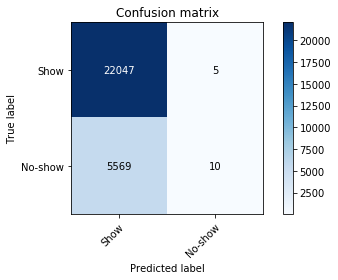

Feature importance:
[0.01 0.13 0.01 0.01 0.   0.01 0.01 0.07 0.75]


In [36]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names,
                      title='Confusion matrix')
plt.show()

print('Feature importance:')
print(clf.feature_importances_)

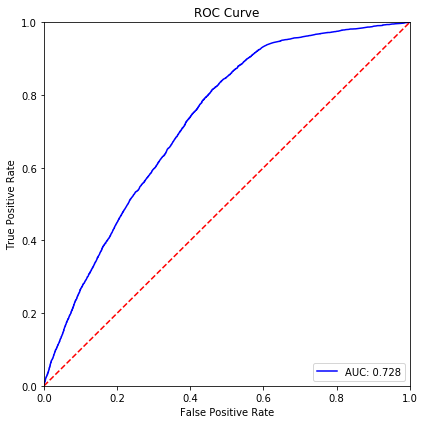

In [37]:
plt.figure(figsize=(6,6))
fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label="AUC: {:.3f}".format(roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

In [38]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresh[optimal_idx]
optimal_threshold

0.21382015534739032

Accuracy:  0.5958524845282472
Classification Report:
              precision    recall  f1-score   support

        Show       0.92      0.54      0.68     22052
     No-show       0.31      0.82      0.45      5579

   micro avg       0.60      0.60      0.60     27631
   macro avg       0.62      0.68      0.56     27631
weighted avg       0.80      0.60      0.63     27631

[[11917 10135]
 [ 1032  4547]]


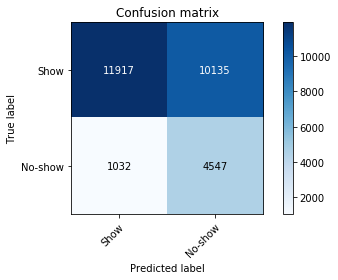

Feature importance:
[0.01 0.13 0.01 0.01 0.   0.01 0.01 0.07 0.75]


In [39]:

y_pred = (clf.predict_proba(X_test)[:,1] >= 0.21382015534739032).astype(bool)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names,
                      title='Confusion matrix')
plt.show()

print('Feature importance:')
print(clf.feature_importances_)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 10 columns):
Gender          110521 non-null int64
Age             110521 non-null int64
Scholarship     110521 non-null int64
Hypertension    110521 non-null int64
Diabetes        110521 non-null int64
Alcoholism      110521 non-null int64
Handicap        110521 non-null int64
SMS_received    110521 non-null int64
No_show         110521 non-null int64
waitdays        110521 non-null int64
dtypes: int64(10)
memory usage: 8.4 MB


# Experiment 2: Subset of features (Age, WaitDays, SMS_received)

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    [("discreteAge", KBinsDiscretizer(n_bins=8, strategy='uniform'), ['Age']),
     ("discreteWait", KBinsDiscretizer(n_bins=8), ['waitdays']),
     ("onehot", OneHotEncoder(sparse=False), ['SMS_received'])])

In [29]:
some_features = df[['Age','SMS_received','waitdays']]
target = df[['No_show']]
X_train, X_test, y_train, y_test = train_test_split(some_features, target, test_size=0.25, random_state=42, stratify=target)

In [30]:
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)


/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    5.7s finished
/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LOGISTIC REGRESSION
Best parameter (CV score=0.723):
{'clf__estimator': LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'clf__estimator__C': 100, 'clf__estimator__penalty': 'l2'}
Best estimator:  Pipeline(memory=None,
     steps=[('clf', ClassifierPipeline(estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)))])
Test Score (AUC):  0.7235062982517784
Accuracy:  0.7980891028192971
Classification Report:
              precision    recall  f1-score   support

        Show       0.80      1.00      0.89     22052
     No-show       0.00      0.00      0.00     

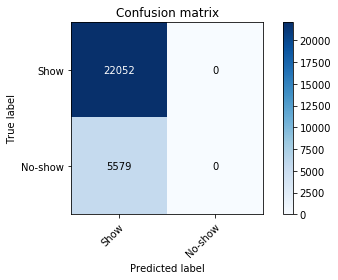

In [53]:
searchLR.fit(X_train_trans, y_train)
print('LOGISTIC REGRESSION')
print("Best parameter (CV score=%0.3f):" % searchLR.best_score_)
print(searchLR.best_params_)
print('Best estimator: ', searchLR.best_estimator_)

y_predLR = searchLR.predict(X_test_trans)
test_score = searchLR.score(X_test_trans, y_test)
print('Test Score (AUC): ', test_score)
print('Accuracy: ', accuracy_score(y_test, y_predLR))
print('Classification Report:')
print(classification_report(y_test, y_predLR, target_names=target_names))
plot_confusion_matrix(y_test, y_predLR, classes=target_names,
                      title='Confusion matrix')
plt.show()

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.5min finished
/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LINEAR SVC
Best parameter (CV score=0.798):
{'clf__estimator': LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'clf__estimator__C': 10, 'clf__estimator__penalty': 'l2'}
Best estimator:  Pipeline(memory=None,
     steps=[('clf', ClassifierPipeline(estimator=LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)))])
Test Score (Accuracy):  0.7980891028192971
Accuracy:  0.7980891028192971
Classification Report:
              precision    recall  f1-score   support

        Show       0.80      1.00      0.89     22052
     No-show       0.00      0.00      0.00      5579

   micro avg       0.80      0.80      0.80     27631
   macro avg       0.40      0.50      0.44 

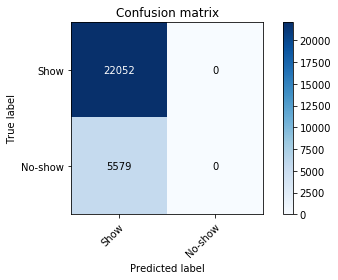

In [33]:

searchSVC.fit(X_train_trans, y_train)
print('LINEAR SVC')
print("Best parameter (CV score=%0.3f):" % searchSVC.best_score_)
print(searchSVC.best_params_)
print('Best estimator: ', searchSVC.best_estimator_)

y_predSVC = searchSVC.predict(X_test_trans)
test_score = searchSVC.score(X_test_trans, y_test)
print('Test Score (Accuracy): ', test_score)
print('Accuracy: ', accuracy_score(y_test, y_predSVC))
print('Classification Report:')
print(classification_report(y_test, y_predSVC, target_names=target_names))
plot_confusion_matrix(y_test, y_predSVC, classes=target_names,
                      title='Confusion matrix')
plt.show()

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.5min finished
/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RANDOM FOREST
Best parameter (CV score=0.723):
{'clf__estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'clf__estimator__criterion': 'entropy', 'clf__estimator__max_depth': 8, 'clf__estimator__max_features': 'auto', 'clf__estimator__n_estimators': 500}
Best estimator:  Pipeline(memory=None,
     steps=[('clf', ClassifierPipeline(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
        

/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


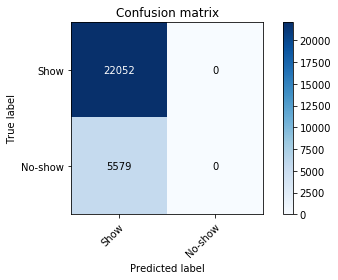

In [54]:
searchRF.fit(X_train_trans, y_train)
print('RANDOM FOREST')
print("Best parameter (CV score=%0.3f):" % searchRF.best_score_)
print(searchRF.best_params_)
print('Best estimator: ', searchRF.best_estimator_)

y_predRF = searchRF.predict(X_test_trans)
test_score = searchRF.score(X_test_trans, y_test)
print('Test Score (AUC): ', test_score)
print('Accuracy: ', accuracy_score(y_test, y_predRF))
print('Classification Report:')
print(classification_report(y_test, y_predRF, target_names=target_names))
plot_confusion_matrix(y_test, y_predRF, classes=target_names,
                      title='Confusion matrix')
plt.show()

/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy:  0.7980891028192971
Classification Report:
              precision    recall  f1-score   support

        Show       0.80      1.00      0.89     22052
     No-show       0.00      0.00      0.00      5579

   micro avg       0.80      0.80      0.80     27631
   macro avg       0.40      0.50      0.44     27631
weighted avg       0.64      0.80      0.71     27631

[[22052     0]
 [ 5579     0]]


/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


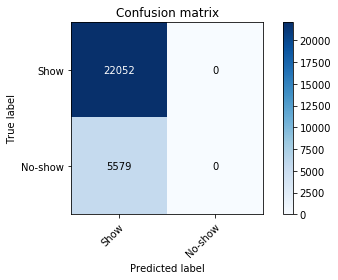

Feature importance:
[8.91e-03 2.45e-02 8.08e-03 7.43e-03 2.40e-02 8.92e-03 1.19e-03 3.07e-04
 0.00e+00 0.00e+00 5.90e-01 3.67e-02 2.17e-02 4.88e-02 6.66e-02 6.13e-02
 4.25e-02 4.87e-02]


In [56]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train_trans, y_train)
y_pred = clf.predict(X_test_trans)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names,
                      title='Confusion matrix')
plt.show()

print('Feature importance:')
print(clf.feature_importances_)

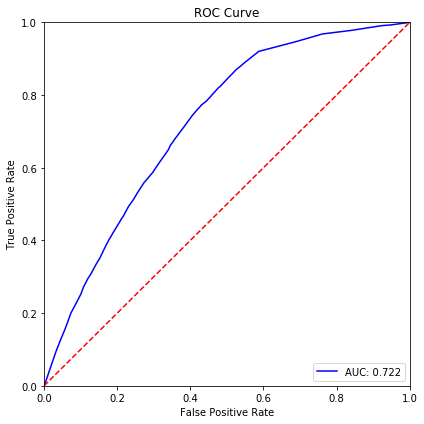

In [58]:
#Make ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test_trans)[:,1])
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label="AUC: {:.3f}".format(roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

In [77]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresh[optimal_idx]
optimal_threshold

0.2012695964451002

In [78]:
optimal_idx2 = np.argmax(tpr + fpr - 1)
optimal_threshold2 = thresh[optimal_idx]
optimal_threshold2

0.2012695964451002

/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy:  0.5536173138865766
Classification Report:
              precision    recall  f1-score   support

        Show       0.93      0.47      0.63     22052
     No-show       0.29      0.87      0.44      5579

   micro avg       0.55      0.55      0.55     27631
   macro avg       0.61      0.67      0.53     27631
weighted avg       0.80      0.55      0.59     27631

[[10461 11591]
 [  743  4836]]


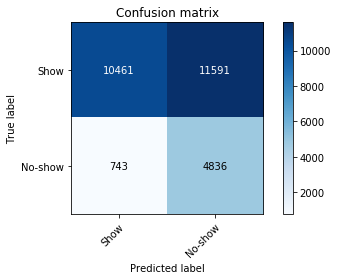

Feature importance:
[9.38e-03 2.36e-02 8.42e-03 7.78e-03 2.39e-02 8.71e-03 1.19e-03 3.06e-04
 0.00e+00 0.00e+00 5.83e-01 3.73e-02 2.05e-02 4.76e-02 6.98e-02 6.28e-02
 4.48e-02 5.08e-02]


In [82]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train_trans, y_train)
y_pred = (clf.predict_proba(X_test_trans)[:,1] >= 0.2012695964451002).astype(bool)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names,
                      title='Confusion matrix')
plt.show()

print('Feature importance:')
print(clf.feature_importances_)


# Experiment 3: Boosting model - AdaBoost

In [14]:
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [15]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train_trans, y_train)


/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Accuracy:  0.7980891028192971
Classification Report:
              precision    recall  f1-score   support

        Show       0.80      1.00      0.89     22052
     No-show       0.00      0.00      0.00      5579

   micro avg       0.80      0.80      0.80     27631
   macro avg       0.40      0.50      0.44     27631
weighted avg       0.64      0.80      0.71     27631

[[22052     0]
 [ 5579     0]]


/Users/Seema/Virtualenvs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


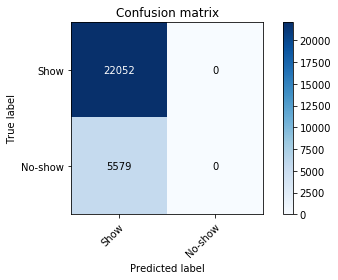

Feature importance:
[0.1  0.06 0.04 0.06 0.06 0.04 0.04 0.02 0.   0.   0.1  0.1  0.06 0.04
 0.06 0.06 0.06 0.1 ]


In [18]:
y_pred = clf.predict(X_test_trans)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names,
                      title='Confusion matrix')
plt.show()

print('Feature importance:')
print(clf.feature_importances_)

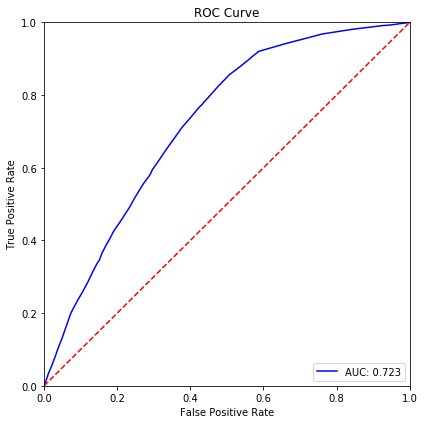

In [19]:
#Make ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test_trans)[:,1])
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label="AUC: {:.3f}".format(roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

In [20]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresh[optimal_idx]
optimal_threshold

0.4933283505999414

Accuracy:  0.5664290108935616
Classification Report:
              precision    recall  f1-score   support

        Show       0.93      0.49      0.64     22052
     No-show       0.30      0.86      0.44      5579

   micro avg       0.57      0.57      0.57     27631
   macro avg       0.62      0.67      0.54     27631
weighted avg       0.80      0.57      0.60     27631

[[10873 11179]
 [  801  4778]]


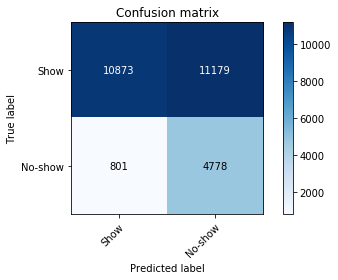

Feature importance:
[0.1  0.06 0.04 0.06 0.06 0.04 0.04 0.02 0.   0.   0.1  0.1  0.06 0.04
 0.06 0.06 0.06 0.1 ]


In [21]:
y_pred = (clf.predict_proba(X_test_trans)[:,1] >= 0.4933283505999414).astype(bool)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names,
                      title='Confusion matrix')
plt.show()

print('Feature importance:')
print(clf.feature_importances_)
